In [1]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("C:/Users/16476/Downloads/Final Project/application_train.csv")

In [38]:

df1['DAYS_BIRTH'] = abs(df1['DAYS_BIRTH'])
df1['DAYS_ID_PUBLISH'] = abs(df1['DAYS_ID_PUBLISH'])
df1['DAYS_LAST_PHONE_CHANGE'] = abs(df1['DAYS_LAST_PHONE_CHANGE'])
df1['DAYS_REGISTRATION'] = abs(df1['DAYS_REGISTRATION'])
df1['DAYS_EMPLOYED'] = abs(df1['DAYS_EMPLOYED'])

In [39]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
colums_stay = ["EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "AMT_ANNUITY", "DAYS_ID_PUBLISH", "DAYS_BIRTH", "DAYS_LAST_PHONE_CHANGE", "DAYS_REGISTRATION", "DAYS_EMPLOYED", "AMT_CREDIT", "AMT_GOODS_PRICE", "TARGET"]

In [42]:
df=df1[colums_stay]

In [43]:
df.head(10)

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,AMT_ANNUITY,DAYS_ID_PUBLISH,DAYS_BIRTH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DAYS_EMPLOYED,AMT_CREDIT,AMT_GOODS_PRICE,TARGET
0,0.139376,0.262949,0.083037,24700.5,2120,9461,1134.0,3648.0,637,406597.5,351000.0,1
1,NaN,0.622246,0.311267,35698.5,291,16765,828.0,1186.0,1188,1293502.5,1129500.0,0
2,0.729567,0.555912,NaN,6750.0,2531,19046,815.0,4260.0,225,135000.0,135000.0,0
3,NaN,0.650442,NaN,29686.5,2437,19005,617.0,9833.0,3039,312682.5,297000.0,0
4,NaN,0.322738,NaN,21865.5,3458,19932,1106.0,4311.0,3038,513000.0,513000.0,0
5,0.621226,0.354225,NaN,27517.5,477,16941,2536.0,4970.0,1588,490495.5,454500.0,0
6,0.492060,0.724000,0.774761,41301.0,619,13778,1562.0,1213.0,3130,1560726.0,1395000.0,0
7,0.540654,0.714279,NaN,42075.0,2379,18850,1070.0,4597.0,449,1530000.0,1530000.0,0
8,0.751724,0.205747,0.587334,33826.5,3514,20099,0.0,7427.0,365243,1019610.0,913500.0,0
9,NaN,0.746644,NaN,20250.0,3992,14469,1673.0,14437.0,2019,405000.0,405000.0,0


In [11]:
df.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'AMT_ANNUITY',
       'DAYS_ID_PUBLISH', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'TARGET'],
      dtype='object')

In [12]:
df.isna().sum()

EXT_SOURCE_3               60965
EXT_SOURCE_2                 660
EXT_SOURCE_1              173378
AMT_ANNUITY                   12
DAYS_ID_PUBLISH                0
DAYS_BIRTH                     0
DAYS_LAST_PHONE_CHANGE         1
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
AMT_CREDIT                     0
AMT_GOODS_PRICE              278
TARGET                         0
dtype: int64

In [13]:
df.dtypes

EXT_SOURCE_3              float64
EXT_SOURCE_2              float64
EXT_SOURCE_1              float64
AMT_ANNUITY               float64
DAYS_ID_PUBLISH             int64
DAYS_BIRTH                  int64
DAYS_LAST_PHONE_CHANGE    float64
DAYS_REGISTRATION         float64
DAYS_EMPLOYED               int64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
TARGET                      int64
dtype: object

In [14]:
df["EXT_SOURCE_3"].median()

0.5352762504724826

In [15]:
df["EXT_SOURCE_3"].mean()

0.5108529061799658

In [16]:
df["EXT_SOURCE_3"] = df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].median())

C:\Users\16476\AppData\Local\Temp\ipykernel_1668\3835614279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EXT_SOURCE_3"] = df["EXT_SOURCE_3"].fillna(df["EXT_SOURCE_3"].median())


In [17]:
df.isna().sum()

EXT_SOURCE_3                   0
EXT_SOURCE_2                 660
EXT_SOURCE_1              173378
AMT_ANNUITY                   12
DAYS_ID_PUBLISH                0
DAYS_BIRTH                     0
DAYS_LAST_PHONE_CHANGE         1
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
AMT_CREDIT                     0
AMT_GOODS_PRICE              278
TARGET                         0
dtype: int64

In [18]:
df["EXT_SOURCE_2"].median()

0.5659614260608526

In [19]:
df["EXT_SOURCE_2"] = df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].median())

C:\Users\16476\AppData\Local\Temp\ipykernel_1668\4246636549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EXT_SOURCE_2"] = df["EXT_SOURCE_2"].fillna(df["EXT_SOURCE_2"].median())


In [20]:
df["EXT_SOURCE_1"] = df["EXT_SOURCE_1"].fillna(df["EXT_SOURCE_1"].median())

C:\Users\16476\AppData\Local\Temp\ipykernel_1668\517329733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EXT_SOURCE_1"] = df["EXT_SOURCE_1"].fillna(df["EXT_SOURCE_1"].median())


In [21]:
df["AMT_ANNUITY"] = df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median())

C:\Users\16476\AppData\Local\Temp\ipykernel_1668\3830314723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AMT_ANNUITY"] = df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median())


In [22]:
df["AMT_GOODS_PRICE"] = df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].median())

C:\Users\16476\AppData\Local\Temp\ipykernel_1668\3432755476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AMT_GOODS_PRICE"] = df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].median())


In [23]:
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].fillna(df["DAYS_LAST_PHONE_CHANGE"].median())

C:\Users\16476\AppData\Local\Temp\ipykernel_1668\181405627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].fillna(df["DAYS_LAST_PHONE_CHANGE"].median())


In [24]:
df.shape

(307511, 12)

In [25]:
target_valuecounts_before=df.TARGET.value_counts()
target_valuecounts_before


0    282686
1     24825
Name: TARGET, dtype: int64

In [26]:
df.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [27]:
df=pd.concat([df[df.TARGET==0].sample(frac=0.15),df[df.TARGET==1]])

In [28]:
target_valuecounts_after_undersampling=df.TARGET.value_counts()
target_valuecounts_after_undersampling 

0    42403
1    24825
Name: TARGET, dtype: int64

In [29]:
target_valuecount_df = pd.DataFrame({'Before':target_valuecounts_before,'After':target_valuecounts_after_undersampling})
target_valuecount_df

,Before,After
0,282686,42403
1,24825,24825


<Axes: >

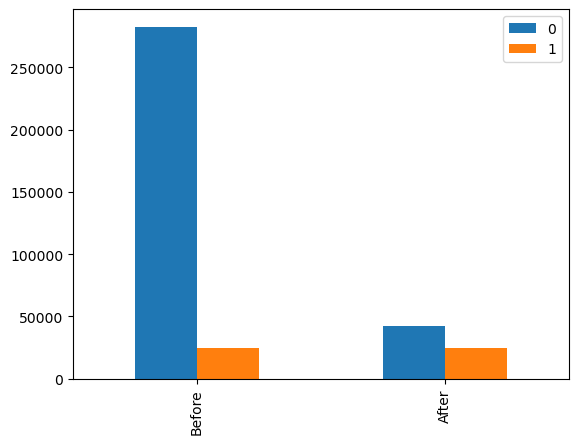

In [30]:
target_valuecount_df.transpose().plot(kind='bar')

In [31]:
df.shape

(67228, 12)

In [32]:
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [44]:
params = {
    'boosting_type': 'gbdt',
    'metric': ['auc', 'binary_logloss', 'binary_error'],
    'learning_rate': 0.1,
    'n_estimators':200,
    'num_leaves':50,
    'max_depth': 50,
    'objective': 'binary',
    'is_unbalance': True
}
clf = lgb.LGBMClassifier()
clf.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],)

[LightGBM] [Info] Number of positive: 18619, number of negative: 31802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2756
[LightGBM] [Info] Number of data points in the train set: 50421, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369271 -> initscore=-0.535347
[LightGBM] [Info] Start training from score -0.535347


LGBMClassifier()

In [34]:
from sklearn.metrics import confusion_matrix

# Predictions on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8919 1682]
 [3285 2921]]


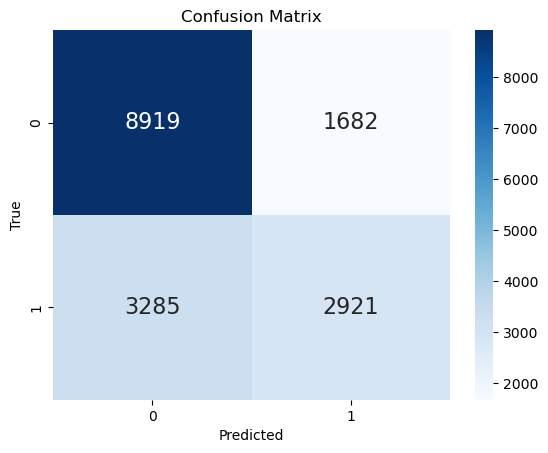

In [35]:
# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [36]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     10601
           1       0.63      0.47      0.54      6206

    accuracy                           0.70     16807
   macro avg       0.68      0.66      0.66     16807
weighted avg       0.70      0.70      0.69     16807



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

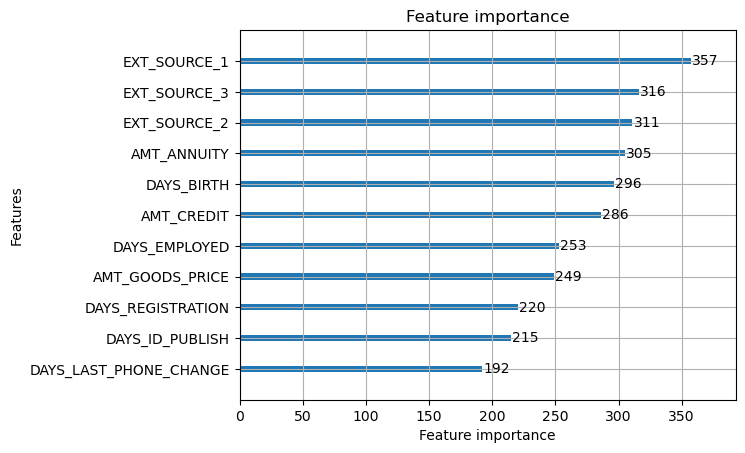

In [46]:
#Plotting the feature importance to understand which features contribute most to the model's predictions.
lgb.plot_importance(clf,max_num_features=20)

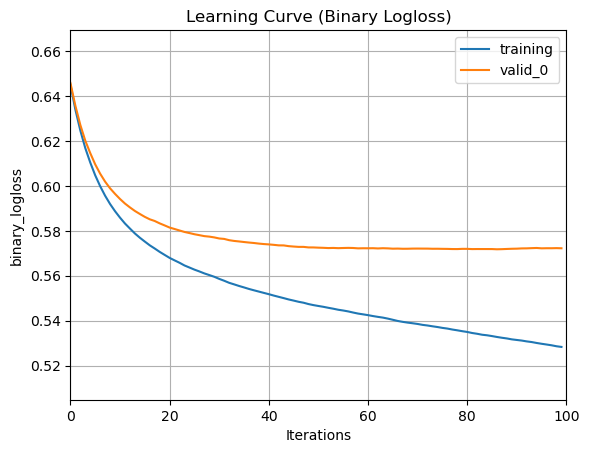

In [49]:
#Plotting the learning curve to visualize how the model's performance changes with the number of training samples.
lgb.plot_metric(clf.evals_result_, metric='binary_logloss')
plt.title('Learning Curve (Binary Logloss)')
plt.show()

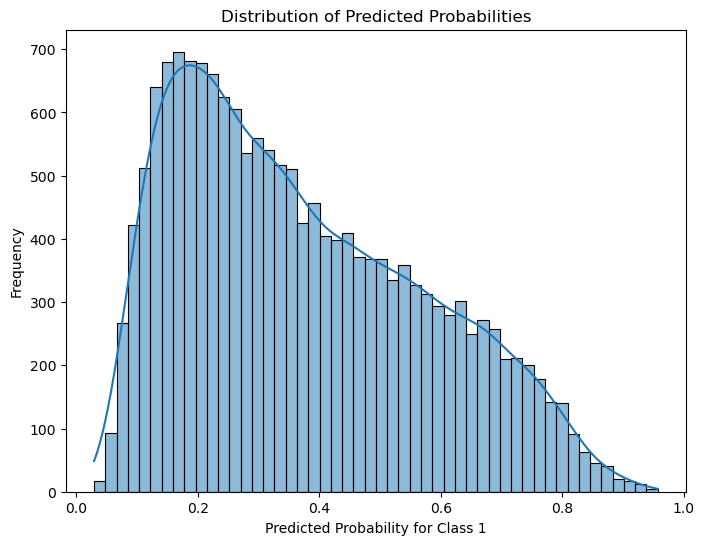

In [51]:
#Visualize the distribution of predicted probabilities on the test set.
plt.figure(figsize=(8, 6))
sns.histplot(clf.predict_proba(X_test)[:, 1], bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability for Class 1')
plt.ylabel('Frequency')
plt.show()

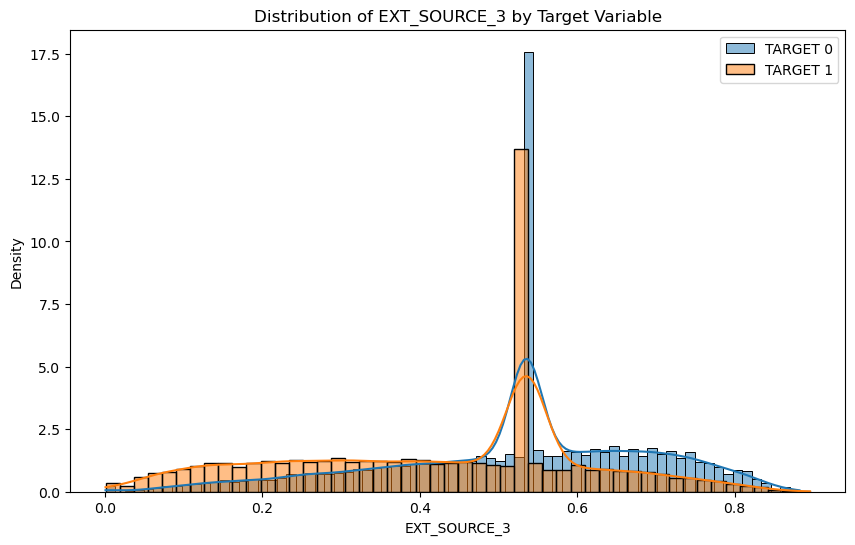

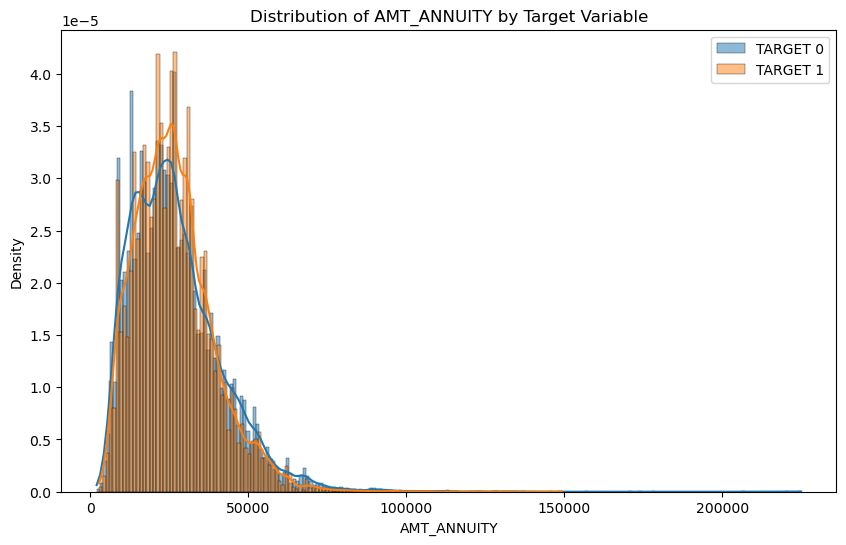

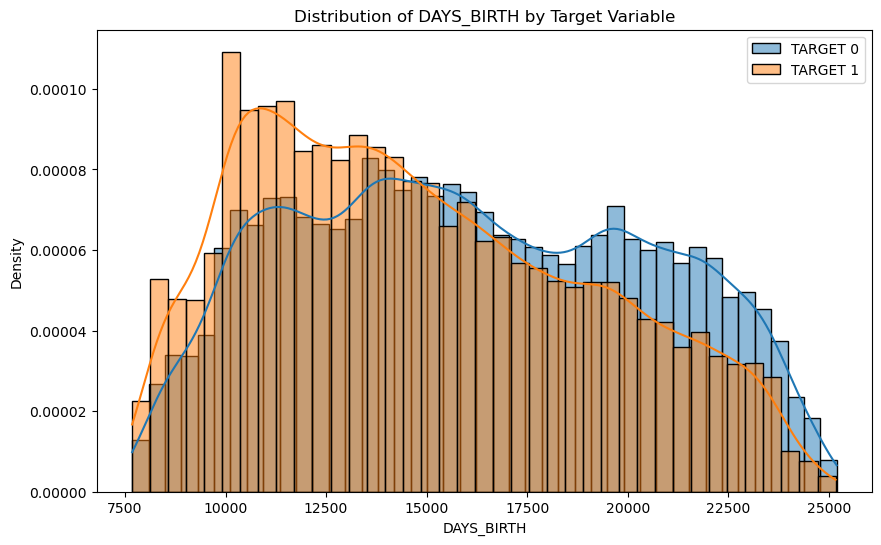

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Key features of interest
key_features = ["EXT_SOURCE_3", "AMT_ANNUITY", "DAYS_BIRTH"]

# Create subplots for each feature
for feature in key_features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for each target class
    for target_class in df['TARGET'].unique():
        subset = df[df['TARGET'] == target_class]
        sns.histplot(subset[feature], kde=True, label=f'TARGET {target_class}', stat="density", common_norm=False)
    
    plt.title(f'Distribution of {feature} by Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()